<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/lending_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ref:
# Data Source:
#   https://www.kaggle.com/wordsforthewise/lending-club
# Notebook:      
#   https://www.kaggle.com/pavlofesenko/minimizing-risks-for-loan-investments
#

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import os
import gc
import time

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)


In [ ]:
path = "C:\\Users\\Administrator\\OneDrive\\Documents\\lending_club_loan_data-II\\"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab_data_files/"

In [ ]:
#os.chdir(path)
#os.listdir()

In [ ]:
# Takes time as data has to go from Google Drive to Colab
accepted = pd.read_csv(path+"accepted_2007_to_2018Q4.csv.gz")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
accepted.head()
accepted.columns.values
accepted.dtypes
accepted.shape

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,...,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,...,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,NaN,...,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Apr-2019,...,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'po

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

(2260701, 151)

In [ ]:
browse_notes = pd.read_excel(path+"LCDataDictionary.xlsx", sheet_name = "browseNotes")

In [ ]:
browse_notes
cols = browse_notes.iloc[ : -2, 0].to_list()
cols

,BrowseNotesFile,Description
0,acceptD,The date which the borrower accepted the offer
1,accNowDelinq,The number of accounts on which the borrower i...
2,accOpenPast24Mths,Number of trades opened in past 24 months.
3,addrState,The state provided by the borrower in the loan...
4,annual_inc_joint,The combined self-reported annual income provi...
...,...,...
103,inq_fi,Number of personal finance inquiries
104,total_cu_tl,Number of finance trades
105,inq_last_12m,Number of credit inquiries in past 12 months
106,NaN,NaN


['acceptD',
 'accNowDelinq',
 'accOpenPast24Mths',
 'addrState',
 'annual_inc_joint',
 'annualInc',
 'application_type',
 'avg_cur_bal',
 'bcOpenToBuy',
 'bcUtil',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'creditPullD',
 'delinq2Yrs',
 'delinqAmnt',
 'desc',
 'dti',
 'dti_joint',
 'earliestCrLine',
 'effective_int_rate',
 'emp_title',
 'empLength',
 'expD',
 'expDefaultRate',
 'ficoRangeHigh',
 'ficoRangeLow',
 'fundedAmnt',
 'grade',
 'homeOwnership',
 'id',
 'ils_exp_d',
 'initialListStatus',
 'inqLast6Mths',
 'installment',
 'intRate',
 'isIncV',
 'listD',
 'loanAmnt',
 'memberId',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mortAcc',
 'msa',
 'mths_since_last_major_derog',
 'mths_since_oldest_il_open',
 'mthsSinceLastDelinq',
 'mthsSinceLastRecord',
 'mthsSinceMostRecentInq',
 'mthsSinceRecentBc',
 'mthsSinceRecentLoanDelinq',
 'mthsSinceRecentRevolDelinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats

In [ ]:
result = set(accepted.columns).intersection(set(cols))
len(result)     # 55
len(set(cols))  # 106
len(set(accepted.columns))  # 151

55

106

151

In [ ]:
result

{'all_util',
 'annual_inc_joint',
 'application_type',
 'avg_cur_bal',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'desc',
 'dti',
 'dti_joint',
 'emp_title',
 'grade',
 'id',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'installment',
 'max_bal_bc',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mths_since_last_major_derog',
 'mths_since_rcnt_il',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'open_acc_6m',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'pct_tl_nvr_dlq',
 'pub_rec_bankruptcies',
 'purpose',
 'tax_liens',
 'term',
 'title',
 'tot_coll_amt',
 'tot_cur_bal',
 'tot_hi_cred_lim',
 'total_bal_il',
 'total_cu_tl',
 'total_il_high_credit_limit',
 'url',
 'zip_code'}

In [ ]:
# Remaining columns
diff = set(cols).difference(result)
accepted.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'po

In [ ]:
diff_com = [ 'open_acc','acc_now_delinq','acc_open_past_24mths','addr_state','annual_inc','bc_open_to_buy',
'bc_util','last_credit_pull_d','delinq_2yrs','delinq_amnt','earliest_cr_line','int_rate','emp_length',
'fico_range_low','fico_range_high','funded_amnt','home_ownership','initial_list_status','inq_last_6mths',
'int_rate','loan_amnt','member_id','mort_acc','mths_since_last_delinq','mths_since_last_record',
'mths_since_recent_inq','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_revol_delinq',
'open_acc','percent_bc_gt_75','pub_rec','revol_bal','revol_util','sub_grade','total_acc','total_bal_ex_mort',
'total_bc_limit','total_rev_hi_lim','verification_status_joint']



In [ ]:
result = list(result)
result.extend(diff_com)
len(result)
result
accepted = accepted[result]

95

['chargeoff_within_12_mths',
 'inq_last_12m',
 'dti',
 'dti_joint',
 'url',
 'tax_liens',
 'il_util',
 'num_rev_tl_bal_gt_0',
 'inq_fi',
 'purpose',
 'num_op_rev_tl',
 'num_tl_op_past_12m',
 'mths_since_rcnt_il',
 'max_bal_bc',
 'num_tl_90g_dpd_24m',
 'pct_tl_nvr_dlq',
 'pub_rec_bankruptcies',
 'mo_sin_old_rev_tl_op',
 'tot_hi_cred_lim',
 'zip_code',
 'mo_sin_rcnt_tl',
 'total_bal_il',
 'mo_sin_rcnt_rev_tl_op',
 'installment',
 'total_cu_tl',
 'num_actv_bc_tl',
 'emp_title',
 'all_util',
 'tot_coll_amt',
 'num_accts_ever_120_pd',
 'num_il_tl',
 'id',
 'annual_inc_joint',
 'num_sats',
 'application_type',
 'open_il_24m',
 'num_bc_sats',
 'open_rv_12m',
 'title',
 'num_tl_30dpd',
 'num_rev_accts',
 'collections_12_mths_ex_med',
 'num_bc_tl',
 'open_il_12m',
 'avg_cur_bal',
 'tot_cur_bal',
 'num_tl_120dpd_2m',
 'open_acc_6m',
 'num_actv_rev_tl',
 'open_rv_24m',
 'mths_since_last_major_derog',
 'term',
 'desc',
 'grade',
 'total_il_high_credit_limit',
 'open_acc',
 'acc_now_delinq',
 'acc_

In [ ]:
accepted.head(2)
accepted.shape    # 2260701, 99)
df = pd.DataFrame(accepted.isnull().sum()).T
df1 = pd.DataFrame(accepted.dtypes).T
pd.concat([df,df1])
accepted.describe()

,chargeoff_within_12_mths,inq_last_12m,dti,dti_joint,url,tax_liens,il_util,num_rev_tl_bal_gt_0,inq_fi,purpose,num_op_rev_tl,num_tl_op_past_12m,mths_since_rcnt_il,max_bal_bc,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,mo_sin_old_rev_tl_op,tot_hi_cred_lim,zip_code,mo_sin_rcnt_tl,total_bal_il,mo_sin_rcnt_rev_tl_op,installment,total_cu_tl,num_actv_bc_tl,emp_title,all_util,tot_coll_amt,num_accts_ever_120_pd,num_il_tl,id,annual_inc_joint,num_sats,application_type,open_il_24m,num_bc_sats,open_rv_12m,title,num_tl_30dpd,num_rev_accts,collections_12_mths_ex_med,num_bc_tl,open_il_12m,avg_cur_bal,tot_cur_bal,num_tl_120dpd_2m,open_acc_6m,num_actv_rev_tl,open_rv_24m,mths_since_last_major_derog,term,desc,grade,total_il_high_credit_limit,open_acc,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,bc_open_to_buy,bc_util,last_credit_pull_d,delinq_2yrs,delinq_amnt,earliest_cr_line,int_rate,emp_length,fico_range_low,fico_range_high,funded_amnt,home_ownership,initial_list_status,inq_last_6mths,int_rate,loan_amnt,member_id,mort_acc,mths_since_last_delinq,mths_since_last_record,mths_since_recent_inq,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,open_acc,percent_bc_gt_75,pub_rec,revol_bal,revol_util,sub_grade,total_acc,total_bal_ex_mort,total_bc_limit,total_rev_hi_lim,verification_status_joint
0,0.0,4.0,5.91,NaN,https://lendingclub.com/browse/loanDetail.acti...,0.0,36.0,4.0,3.0,debt_consolidation,4.0,3.0,21.0,722.0,0.0,76.9,0.0,128.0,178050.0,190xx,3.0,4981.0,3.0,123.03,1.0,2.0,leadman,34.0,722.0,2.0,3.0,68407277,NaN,7.0,Individual,1.0,2.0,3.0,Debt consolidation,0.0,9.0,0.0,5.0,0.0,20701.0,144904.0,0.0,2.0,4.0,3.0,30.0,36 months,NaN,C,13734.0,7.0,0.0,4.0,PA,55000.0,1506.0,37.2,Mar-2019,0.0,0.0,Aug-2003,13.99,10+ years,675.0,679.0,3600.0,MORTGAGE,w,1.0,13.99,3600.0,NaN,1.0,30.0,NaN,4.0,4.0,69.0,69.0,7.0,0.0,0.0,2765.0,29.7,C4,13.0,7746.0,2400.0,9300.0,NaN
1,0.0,6.0,16.06,NaN,https://lendingclub.com/browse/loanDetail.acti...,0.0,73.0,5.0,0.0,small_business,20.0,2.0,19.0,6472.0,0.0,97.4,0.0,192.0,314017.0,577xx,2.0,18005.0,2.0,820.28,0.0,5.0,Engineer,29.0,0.0,0.0,6.0,68355089,NaN,22.0,Individual,1.0,13.0,2.0,Business,0.0,27.0,0.0,17.0,0.0,9733.0,204396.0,0.0,1.0,5.0,3.0,NaN,36 months,NaN,C,24667.0,22.0,0.0,4.0,SD,65000.0,57830.0,27.1,Mar-2019,1.0,0.0,Dec-1999,11.99,10+ years,715.0,719.0,24700.0,MORTGAGE,w,4.0,11.99,24700.0,NaN,4.0,6.0,NaN,0.0,2.0,NaN,6.0,22.0,7.7,0.0,21470.0,19.2,C1,38.0,39475.0,79300.0,111800.0,NaN


(2260701, 95)

,chargeoff_within_12_mths,inq_last_12m,dti,dti_joint,url,tax_liens,il_util,num_rev_tl_bal_gt_0,inq_fi,purpose,num_op_rev_tl,num_tl_op_past_12m,mths_since_rcnt_il,max_bal_bc,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,mo_sin_old_rev_tl_op,tot_hi_cred_lim,zip_code,mo_sin_rcnt_tl,total_bal_il,mo_sin_rcnt_rev_tl_op,installment,total_cu_tl,num_actv_bc_tl,emp_title,all_util,tot_coll_amt,num_accts_ever_120_pd,num_il_tl,id,annual_inc_joint,num_sats,application_type,open_il_24m,num_bc_sats,open_rv_12m,title,num_tl_30dpd,num_rev_accts,collections_12_mths_ex_med,num_bc_tl,open_il_12m,avg_cur_bal,tot_cur_bal,num_tl_120dpd_2m,open_acc_6m,num_actv_rev_tl,open_rv_24m,mths_since_last_major_derog,term,desc,grade,total_il_high_credit_limit,open_acc,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,bc_open_to_buy,bc_util,last_credit_pull_d,delinq_2yrs,delinq_amnt,earliest_cr_line,int_rate,emp_length,fico_range_low,fico_range_high,funded_amnt,home_ownership,initial_list_status,inq_last_6mths,int_rate,loan_amnt,member_id,mort_acc,mths_since_last_delinq,mths_since_last_record,mths_since_recent_inq,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,open_acc,percent_bc_gt_75,pub_rec,revol_bal,revol_util,sub_grade,total_acc,total_bal_ex_mort,total_bc_limit,total_rev_hi_lim,verification_status_joint
0,178,866163,1744,2139995,33,138,1068883,70309,866162,33,70309,70309,909957,866162,70309,70464,1398,70310,70309,34,70309,866162,70310,33,866163,70309,167002,866381,70309,70309,70309,0,2139991,58623,33,866162,58623,866162,23358,70309,70310,178,70309,866162,70379,70309,153690,866163,70309,866162,1679926,33,2134634,33,70309,62,62,50063,33,37,74968,76104,105,62,62,62,33,146940,33,33,33,33,33,63,33,33,2260701,50063,1158535,1901545,295468,73445,1741000,1520342,62,75412,62,33,1835,33,62,50063,50063,70309,2144971
0,float64,float64,float64,float64,object,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,object,float64,float64,object,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,float64,float64,float64,float64,object,float64,float64,float64,object,float64,float64,object,float64,object,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,object


,chargeoff_within_12_mths,inq_last_12m,dti,dti_joint,tax_liens,il_util,num_rev_tl_bal_gt_0,inq_fi,num_op_rev_tl,num_tl_op_past_12m,mths_since_rcnt_il,max_bal_bc,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,mo_sin_old_rev_tl_op,tot_hi_cred_lim,mo_sin_rcnt_tl,total_bal_il,mo_sin_rcnt_rev_tl_op,installment,total_cu_tl,num_actv_bc_tl,all_util,tot_coll_amt,num_accts_ever_120_pd,num_il_tl,annual_inc_joint,num_sats,open_il_24m,num_bc_sats,open_rv_12m,num_tl_30dpd,num_rev_accts,collections_12_mths_ex_med,num_bc_tl,open_il_12m,avg_cur_bal,tot_cur_bal,num_tl_120dpd_2m,open_acc_6m,num_actv_rev_tl,open_rv_24m,mths_since_last_major_derog,total_il_high_credit_limit,open_acc,acc_now_delinq,acc_open_past_24mths,annual_inc,bc_open_to_buy,bc_util,delinq_2yrs,delinq_amnt,int_rate,fico_range_low,fico_range_high,funded_amnt,inq_last_6mths,int_rate,loan_amnt,member_id,mort_acc,mths_since_last_delinq,mths_since_last_record,mths_since_recent_inq,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,open_acc,percent_bc_gt_75,pub_rec,revol_bal,revol_util,total_acc,total_bal_ex_mort,total_bc_limit,total_rev_hi_lim
count,2.260523e+06,1.394538e+06,2.258957e+06,120706.000000,2.260563e+06,1.191818e+06,2.190392e+06,1.394539e+06,2.190392e+06,2.190392e+06,1.350744e+06,1.394539e+06,2.190392e+06,2.190237e+06,2.259303e+06,2.190391e+06,2.190392e+06,2.190392e+06,1.394539e+06,2.190391e+06,2.260668e+06,1.394538e+06,2.190392e+06,1.394320e+06,2.190392e+06,2.190392e+06,2.190392e+06,1.207100e+05,2.202078e+06,1.394539e+06,2.202078e+06,1.394539e+06,2.190392e+06,2.190391e+06,2.260523e+06,2.190392e+06,1.394539e+06,2.190322e+06,2.190392e+06,2.107011e+06,1.394538e+06,2.190392e+06,1.394539e+06,580775.000000,2.190392e+06,2.260639e+06,2.260639e+06,2.210638e+06,2.260664e+06,2.185733e+06,2.184597e+06,2.260639e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260638e+06,2.260668e+06,2.260668e+06,0.0,2.210638e+06,1.102166e+06,359156.000000,1.965233e+06,2.187256e+06,519701.000000,740359.000000,2.260639e+06,2.185289e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.210638e+06,2.210638e+06,2.190392e+06
mean,8.464413e-03,2.036667e+00,1.882420e+01,19.251817,4.677109e-02,6.914098e+01,5.577951e+00,1.012867e+00,8.246523e+00,2.076755e+00,2.122236e+01,5.806393e+03,8.293767e-02,9.411458e+01,1.281935e-01,1.814916e+02,1.782428e+05,8.297469e+00,3.550665e+04,1.402409e+01,4.458068e+02,1.477304e+00,3.676069e+00,5.703230e+01,2.327317e+02,5.002082e-01,8.413439e+00,1.236246e+05,1.162813e+01,1.562752e+00,4.774183e+00,1.290133e+00,2.813652e-03,1.400463e+01,1.814580e-02,7.726402e+00,6.764314e-01,1.354780e+04,1.424922e+05,6.373958e-04,9.344199e-01,5.629468e+00,2.749923e+00,44.164220,4.373201e+04,1.161240e+01,4.147942e-03,4.521656e+00,7.799243e+04,1.139426e+04,5.789995e+01,3.068792e-01,1.236983e+01,1.309283e+01,6.985882e+02,7.025884e+02,1.504166e+04,5.768354e-01,1.309283e+01,1.504693e+04,NaN,1.555382e+00,3.454092e+01,72.312842,7.024194e+00,2.484485e+01,39.303090,35.782223,1.161240e+01,4.243513e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,5.102294e+04,2.319377e+04,3.457394e+04
std,1.048098e-01,2.383117e+00,1.418333e+01,7.822086,3.775338e-01,2.374839e+01,3.293434e+00,1.489456e+00,4.683928e+00,1.830711e+00,2.604919e+01,5.690561e+03,4.935732e-01,9.036140e+00,3.646130e-01,9.711845e+01,1.815748e+05,9.208557e+00,4.409746e+04,1.753308e+01,2.671735e+02,2.672991e+00,2.324646e+00,2.090475e+01,8.518462e+03,1.350326e+00,7.359114e+00,7.416135e+04,5.644027e+00,1.578672e+00,3.037921e+00,1.506827e+00,5.616522e-02,8.038868e+00,1.508131e-01,4.701430e+00,9.256354e-01,1.647408e+04,1.606926e+05,2.710643e-02,1.140700e+00,3.382874e+00,2.596911e+00,21.533121,4.507298e+04,5.640861e+00,6.961656e-02,3.164229e+00,1.126962e+05,1.659953e+04,2.858347e+01,8.672303e-01,7.264648e+02,4.832138e+00,3.301038e+01,3.301124e+01,9.188413e+03,8.859632e-01,4.832138e+00,9.190245e+03,NaN,1.904981e+00,2.190047e+01,26.464094,5.965411e+00,3.231925e+01,22.617689,22.307239,5.640861e+00,3

In [ ]:
accepted['term'] = accepted['term'].map({' 36 months' : "a", " 60 months" : "b"})

In [ ]:
accepted.dtypes.value_counts()

float64    77
object     18
dtype: int64

71.0

0.0

4.0

0

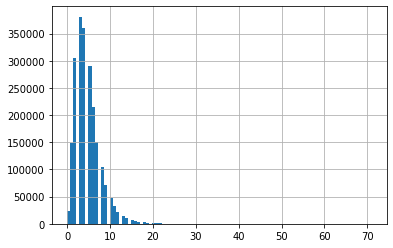

In [ ]:
# Number of satisfactory bankcard accounts
# Fill median
accepted['num_bc_sats'].max()
accepted['num_bc_sats'].min()
accepted['num_bc_sats'].hist(bins = 100)
accepted['num_bc_sats'].median()  # 4.0
accepted.loc[accepted['num_bc_sats'].isnull(),'num_bc_sats'] = accepted['num_bc_sats'].median() 
accepted['num_bc_sats'].isnull().sum()

86.0

0.0

7.0

0

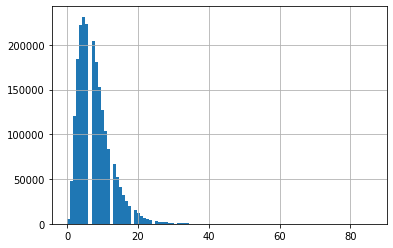

In [ ]:
# Number of bankcard accounts
# Fill median
accepted['num_bc_tl'].max()
accepted['num_bc_tl'].min()
accepted['num_bc_tl'].hist(bins = 100)
accepted['num_bc_tl'].median()  # 4.0
accepted.loc[accepted['num_bc_tl'].isnull(),'num_bc_tl'] = accepted['num_bc_tl'].median() 
accepted['num_bc_tl'].isnull().sum()

9971659.0

0.0

79240.0

70309

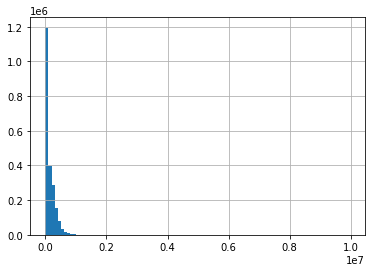

In [ ]:
# Total current balance
# Fill median
accepted['tot_cur_bal'].max()
accepted['tot_cur_bal'].min()
accepted['tot_cur_bal'].hist(bins = 100)
accepted['tot_cur_bal'].median()  
#accepted.loc[accepted['tot_cur_bal'].isnull(),'tot_cur_bal'] = accepted['tot_cur_bal'].median() 
accepted['tot_cur_bal'].isnull().sum()

1837038.0

0.0

23127.0

0

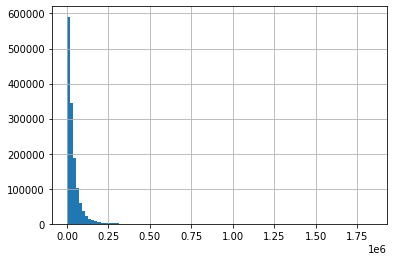

In [ ]:
# Total current balance
# Fill median
accepted['total_bal_il'].max()
accepted['total_bal_il'].min()
accepted['total_bal_il'].hist(bins = 100)
accepted['total_bal_il'].median()  
accepted.loc[accepted['total_bal_il'].isnull(),'total_bal_il'] = accepted['total_bal_il'].median() 
accepted['total_bal_il'].isnull().sum()

1000.0

0.0

72.0

1068883

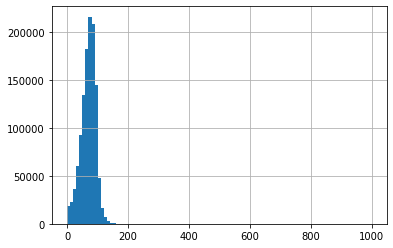

In [ ]:
# Ratio of total current balance to high credit/credit limit on all install acct
# Fill median
accepted['il_util'].max()
accepted['il_util'].min()
accepted['il_util'].hist(bins = 100)
accepted['il_util'].median()  
#accepted.loc[accepted['il_util'].isnull(),'il_util'] = accepted['il_util'].median() 
accepted['il_util'].isnull().sum()

In [ ]:
df = accepted.select_dtypes(include = 'object')
df.columns
df.nunique()
df.isnull().sum()

Index(['url', 'purpose', 'zip_code', 'emp_title', 'id', 'application_type',
       'title', 'term', 'desc', 'grade', 'addr_state', 'last_credit_pull_d',
       'earliest_cr_line', 'emp_length', 'home_ownership',
       'initial_list_status', 'sub_grade', 'verification_status_joint'],
      dtype='object')

url                          2260668
purpose                           14
zip_code                         956
emp_title                     512694
id                           2260701
application_type                   2
title                          63155
term                               2
desc                          124501
grade                              7
addr_state                        51
last_credit_pull_d               141
earliest_cr_line                 754
emp_length                        11
home_ownership                     6
initial_list_status                2
sub_grade                         35
verification_status_joint          3
dtype: int64

url                               33
purpose                           33
zip_code                          34
emp_title                     167002
id                                 0
application_type                  33
title                          23358
term                              33
desc                         2134634
grade                             33
addr_state                        33
last_credit_pull_d               105
earliest_cr_line                  62
emp_length                    146940
home_ownership                    33
initial_list_status               33
sub_grade                         33
verification_status_joint    2144971
dtype: int64

In [ ]:
del(df)
gc.collect()
accepted.drop(columns = ['verification_status_joint', 'desc', 'emp_length', 'emp_title'], inplace = True)

454

In [ ]:
acc_obj = accepted.select_dtypes(include = ['object'])

In [ ]:
acc_num = accepted.select_dtypes(include = ['float64'])

In [ ]:
si = SimpleImputer(strategy = 'median')
acc_num_x = si.fit_transform(acc_num)

In [ ]:
acc_obj.shape   # (2260701, 14)
acc_obj.drop(columns = ['id', 'url'], inplace = True)

(2260701, 14)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
x1 = pd.DataFrame(acc_obj.nunique()).T
x2 = pd.DataFrame(acc_obj.isnull().sum()).T
x = pd.concat([x1,x2])
x
del(x1)
del(x2)

,purpose,zip_code,application_type,title,term,grade,addr_state,last_credit_pull_d,earliest_cr_line,home_ownership,initial_list_status,sub_grade
0,14,956,2,63155,2,7,51,141,754,6,2,35
0,33,34,33,23358,33,33,33,105,62,33,33,33


In [ ]:
for col in acc_obj.columns:
  val = acc_obj[col].mode()[0]
  acc_obj[col].fillna(value = val, inplace = True)
  print(val)


#acc_obj['title'].mode()
#acc_obj['zip_code'].mode()
#acc_obj['term'].mode()
#acc_obj['purpose'].mode()
#acc_obj['grade'].mode()
#acc_obj.grade.mode()


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


debt_consolidation
112xx
Individual
Debt consolidation
a
B
CA
Mar-2019
Sep-2004
MORTGAGE
w
C1


In [ ]:
acc_obj.isnull().sum()
np.sum(np.isnan(acc_num_x))

purpose                0
zip_code               0
application_type       0
title                  0
term                   0
grade                  0
addr_state             0
last_credit_pull_d     0
earliest_cr_line       0
home_ownership         0
initial_list_status    0
sub_grade              0
dtype: int64

0

In [ ]:
# sklearn imputer is very slow for categorical data.
# See: https://datascience.stackexchange.com/a/66041/64849
#start = time.time()
#si_obj = SimpleImputer(strategy = 'most_frequent')
#acc_obj_x = si_obj.fit_transform(acc_obj)
#end = time.time()
#(end-start)/60

In [ ]:
#del(accepted)


In [ ]:
print(np.min(acc_num_x))
print(np.max(acc_num_x))

-1.0
110000000.0


In [ ]:
acc_num_x = acc_num_x.astype('float32')

In [ ]:
# Change to float16
df = np.hstack((acc_obj.values, acc_num_x))

In [ ]:
del(acc_num_x)
del(acc_obj)
del(accepted)
del(acc_num)

In [ ]:
gc.collect()

124

In [ ]:
# It is a 2gb file
np.save(path + "acc.npy", df)

In [ ]:
ohe = OneHotEncoder()
ohe.fit(df)
data = ohe.transform(df)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
df.fillna(df.median(),inplace = True )

d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
df.head()
accepted.head()

,num_bc_sats,num_bc_tl,tot_cur_bal,total_bal_il,il_util,num_actv_bc_tl,mths_since_rcnt_il,max_bal_bc,num_sats,dti,tax_liens,mths_since_last_major_derog,collections_12_mths_ex_med,open_il_12m,avg_cur_bal,tot_coll_amt,num_accts_ever_120_pd,num_tl_op_past_12m,num_rev_tl_bal_gt_0,open_rv_12m,tot_hi_cred_lim,inq_fi,num_il_tl,open_rv_24m,num_actv_rev_tl,pub_rec_bankruptcies,total_il_high_credit_limit,total_cu_tl,open_il_24m,open_acc_6m,mo_sin_old_rev_tl_op,num_tl_90g_dpd_24m,num_op_rev_tl,annual_inc_joint,installment,chargeoff_within_12_mths,num_tl_120dpd_2m,all_util,num_tl_30dpd,mo_sin_rcnt_tl,mo_sin_rcnt_rev_tl_op,dti_joint,num_rev_accts,pct_tl_nvr_dlq,inq_last_12m,open_acc,open_acc,acc_now_delinq,acc_open_past_24mths,annual_inc,bc_open_to_buy,bc_util,delinq_2yrs,delinq_amnt,int_rate,int_rate,fico_range_low,fico_range_high,funded_amnt,inq_last_6mths,int_rate,int_rate,loan_amnt,member_id,mort_acc,mths_since_last_delinq,mths_since_last_record,mths_since_recent_inq,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,open_acc,open_acc,percent_bc_gt_75,pub_rec,revol_bal,revol_util,total_acc,total_bal_ex_mort,total_bc_limit,total_rev_hi_lim
0,2.0,5.0,144904.0,4981.0,36.0,2.0,21.0,722.0,7.0,5.91,0.0,30.0,0.0,0.0,20701.0,722.0,2.0,3.0,4.0,3.0,178050.0,3.0,3.0,3.0,4.0,0.0,13734.0,1.0,1.0,2.0,128.0,0.0,4.0,NaN,123.03,0.0,0.0,34.0,0.0,3.0,3.0,NaN,9.0,76.9,4.0,7.0,7.0,0.0,4.0,55000.0,1506.0,37.2,0.0,0.0,13.99,13.99,675.0,679.0,3600.0,1.0,13.99,13.99,3600.0,NaN,1.0,30.0,NaN,4.0,4.0,69.0,69.0,7.0,7.0,0.0,0.0,2765.0,29.7,13.0,7746.0,2400.0,9300.0
1,13.0,17.0,204396.0,18005.0,73.0,5.0,19.0,6472.0,22.0,16.06,0.0,NaN,0.0,0.0,9733.0,0.0,0.0,2.0,5.0,2.0,314017.0,0.0,6.0,3.0,5.0,0.0,24667.0,0.0,1.0,1.0,192.0,0.0,20.0,NaN,820.28,0.0,0.0,29.0,0.0,2.0,2.0,NaN,27.0,97.4,6.0,22.0,22.0,0.0,4.0,65000.0,57830.0,27.1,1.0,0.0,11.99,11.99,715.0,719.0,24700.0,4.0,11.99,11.99,24700.0,NaN,4.0,6.0,NaN,0.0,2.0,NaN,6.0,22.0,22.0,7.7,0.0,21470.0,19.2,38.0,39475.0,79300.0,111800.0
2,2.0,4.0,189699.0,10827.0,73.0,2.0,19.0,2081.0,6.0,10.78,0.0,NaN,0.0,0.0,31617.0,0.0,0.0,0.0,3.0,0.0,218418.0,2.0,6.0,2.0,3.0,0.0,14877.0,5.0,4.0,0.0,184.0,0.0,4.0,71000.0,432.66,0.0,0.0,65.0,0.0,14.0,14.0,13.85,7.0,100.0,1.0,6.0,6.0,0.0,6.0,63000.0,2737.0,55.9,0.0,0.0,10.78,10.78,695.0,699.0,20000.0,0.0,10.78,10.78,20000.0,NaN,5.0,NaN,NaN,10.0,101.0,NaN,NaN,6.0,6.0,50.0,0.0,7869.0,56.2,18.0,18696.0,6200.0,14000.0
3,8.0,10.0,301500.0,12609.0,70.0,4.0,23.0,6987.0,13.0,17.06,0.0,NaN,0.0,0.0,23192.0,0.0,0.0,1.0,5.0,1.0,381215.0,0.0,2.0,1.0,5.0,0.0,18000.0,1.0,1.0,1.0,87.0,0.0,10.0,NaN,829.90,0.0,0.0,45.0,0.0,2.0,2.0,NaN,13.0,100.0,0.0,13.0,13.0,0.0,2.0,110000.0,54962.0,12.1,0.0,0.0,14.85,14.85,785.0,789.0,35000.0,0.0,14.85,14.85,35000.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,13.0,13.0,0.0,0.0,7802.0,11.6,17.0,52226.0,62500.0,67300.0
4,5.0,9.0,331730.0,73839.0,84.0,4.0,14.0,9702.0,12.0,25.37,0.0,NaN,0.0,0.0,27644.0,0.0,0.0,4.0,6.0,4.0,439570.0,2.0,10.0,7.0,6.0,0.0,88097.0,1.0,3.0,1.0,210.0,0.0,7.0,NaN,289.91,0.0,0.0,78.0,0.0,4.0,4.0,NaN,19.0,96.6,3.0,12.0,12.0,0.0,10.0,104433.0,4567.0,77.5,1.0,0.0,22.45,22.45,695.0,699.0,10400.0,3.0,22.45,22.45,10400.0,NaN,6.0,12.0,NaN,1.0,4.0,12.0,12.0,12.0,12.0,60.0,0.0,21929.0,64.5,35.0,95768.0,20300.0,34000.0


,num_bc_sats,num_bc_tl,tot_cur_bal,total_bal_il,il_util,num_actv_bc_tl,mths_since_rcnt_il,max_bal_bc,num_sats,dti,tax_liens,term,mths_since_last_major_derog,collections_12_mths_ex_med,open_il_12m,avg_cur_bal,tot_coll_amt,num_accts_ever_120_pd,num_tl_op_past_12m,num_rev_tl_bal_gt_0,open_rv_12m,tot_hi_cred_lim,inq_fi,num_il_tl,grade,purpose,open_rv_24m,emp_title,title,num_actv_rev_tl,pub_rec_bankruptcies,total_il_high_credit_limit,total_cu_tl,open_il_24m,open_acc_6m,mo_sin_old_rev_tl_op,num_tl_90g_dpd_24m,num_op_rev_tl,annual_inc_joint,installment,id,zip_code,chargeoff_within_12_mths,num_tl_120dpd_2m,url,all_util,application_type,num_tl_30dpd,mo_sin_rcnt_tl,mo_sin_rcnt_rev_tl_op,dti_joint,num_rev_accts,desc,pct_tl_nvr_dlq,inq_last_12m,open_acc,open_acc,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,bc_open_to_buy,bc_util,last_credit_pull_d,delinq_2yrs,delinq_amnt,earliest_cr_line,int_rate,int_rate,emp_length,fico_range_low,fico_range_high,funded_amnt,home_ownership,initial_list_status,inq_last_6mths,int_rate,int_rate,loan_amnt,member_id,mort_acc,mths_since_last_delinq,mths_since_last_record,mths_since_recent_inq,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,open_acc,open_acc,percent_bc_gt_75,pub_rec,revol_bal,revol_util,sub_grade,total_acc,total_bal_ex_mort,total_bc_limit,total_rev_hi_lim,verification_status_joint
0,2.0,5.0,144904.0,4981.0,36.0,2.0,21.0,722.0,7.0,5.91,0.0,36 months,30.0,0.0,0.0,20701.0,722.0,2.0,3.0,4.0,3.0,178050.0,3.0,3.0,C,debt_consolidation,3.0,leadman,Debt consolidation,4.0,0.0,13734.0,1.0,1.0,2.0,128.0,0.0,4.0,NaN,123.03,68407277,190xx,0.0,0.0,https://lendingclub.com/browse/loanDetail.acti...,34.0,Individual,0.0,3.0,3.0,NaN,9.0,NaN,76.9,4.0,7.0,7.0,0.0,4.0,PA,55000.0,1506.0,37.2,Mar-2019,0.0,0.0,Aug-2003,13.99,13.99,10+ years,675.0,679.0,3600.0,MORTGAGE,w,1.0,13.99,13.99,3600.0,NaN,1.0,30.0,NaN,4.0,4.0,69.0,69.0,7.0,7.0,0.0,0.0,2765.0,29.7,C4,13.0,7746.0,2400.0,9300.0,NaN
1,13.0,17.0,204396.0,18005.0,73.0,5.0,19.0,6472.0,22.0,16.06,0.0,36 months,NaN,0.0,0.0,9733.0,0.0,0.0,2.0,5.0,2.0,314017.0,0.0,6.0,C,small_business,3.0,Engineer,Business,5.0,0.0,24667.0,0.0,1.0,1.0,192.0,0.0,20.0,NaN,820.28,68355089,577xx,0.0,0.0,https://lendingclub.com/browse/loanDetail.acti...,29.0,Individual,0.0,2.0,2.0,NaN,27.0,NaN,97.4,6.0,22.0,22.0,0.0,4.0,SD,65000.0,57830.0,27.1,Mar-2019,1.0,0.0,Dec-1999,11.99,11.99,10+ years,715.0,719.0,24700.0,MORTGAGE,w,4.0,11.99,11.99,24700.0,NaN,4.0,6.0,NaN,0.0,2.0,NaN,6.0,22.0,22.0,7.7,0.0,21470.0,19.2,C1,38.0,39475.0,79300.0,111800.0,NaN
2,2.0,4.0,189699.0,10827.0,73.0,2.0,19.0,2081.0,6.0,10.78,0.0,60 months,NaN,0.0,0.0,31617.0,0.0,0.0,0.0,3.0,0.0,218418.0,2.0,6.0,B,home_improvement,2.0,truck driver,NaN,3.0,0.0,14877.0,5.0,4.0,0.0,184.0,0.0,4.0,71000.0,432.66,68341763,605xx,0.0,0.0,https://lendingclub.com/browse/loanDetail.acti...,65.0,Joint App,0.0,14.0,14.0,13.85,7.0,NaN,100.0,1.0,6.0,6.0,0.0,6.0,IL,63000.0,2737.0,55.9,Mar-2019,0.0,0.0,Aug-2000,10.78,10.78,10+ years,695.0,699.0,20000.0,MORTGAGE,w,0.0,10.78,10.78,20000.0,NaN,5.0,NaN,NaN,10.0,101.0,NaN,NaN,6.0,6.0,50.0,0.0,7869.0,56.2,B4,18.0,18696.0,6200.0,14000.0,Not Verified
3,8.0,10.0,301500.0,12609.0,70.0,4.0,23.0,6987.0,13.0,17.06,0.0,60 months,NaN,0.0,0.0,23192.0,0.0,0.0,1.0,5.0,1.0,381215.0,0.0,2.0,C,debt_consolidation,1.0,Information Systems Officer,Debt consolidation,5.0,0.0,18000.0,1.0,1.0,1.0,87.0,0.0,10.0,NaN,829.90,66310712,076xx,0.0,0.0,https://lendingclub.com/browse/loanDetail.acti...,45.0,Individual,0.0,2.0,2.0,NaN,13.0,NaN,100.0,0.0,13.0,13.0,0.0,2.0,NJ,110000.0,54962.0,12.1,Mar-2019,0.0,0.0,Sep-2008,14.85,14.85,10+ years,785.0,789.0,35000.0,MORTGAGE,w,0.0,14.85,14.85,35000.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,13.0,13.0,0.0,0.0,7802.0,11.6,C5,17.0,52226.0,62500.0,67300.0,NaN
4,5.0,9.0,331730.0,73839.0,84.0,4.0,14.0,9702.0,12.0,25.37,0.0,60 months,NaN,0.0,0.0,27644.0,0.0,0.0,4.0,6.0,4.0,439570.0,2.0,10.0,F,major_purchase,7.0,Contract Specialist,Major purchase,6.0,0.0,88097.0,1.0,3.0,1.0

In [ ]:
# Let us just see 
cols_idx = [0,19,49,59,118,129,130,131,134,135,136,139,145,146,147]
accepted.iloc[:,cols_idx].head()
accepted.iloc[:,cols_idx].tail()
accepted.iloc[:,cols_idx].dtypes

,id,desc,next_pymnt_d,verification_status_joint,sec_app_earliest_cr_line,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag_date,settlement_status,settlement_date
0,68407277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,NaN,Not Verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,Apr-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id,desc,next_pymnt_d,verification_status_joint,sec_app_earliest_cr_line,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag_date,settlement_status,settlement_date
2260696,88985880,NaN,Apr-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mar-2019,ACTIVE,Mar-2019
2260698,88215728,NaN,Apr-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260700,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


id                           object
desc                         object
next_pymnt_d                 object
verification_status_joint    object
sec_app_earliest_cr_line     object
hardship_type                object
hardship_reason              object
hardship_status              object
hardship_start_date          object
hardship_end_date            object
payment_plan_start_date      object
hardship_loan_status         object
debt_settlement_flag_date    object
settlement_status            object
settlement_date              object
dtype: object

In [ ]:
# Let us collect all date columns and have a look at dates
accepted.loc[~accepted['last_pymnt_d'].isnull(), 'last_pymnt_d'].head(2)
accepted.loc[~accepted['next_pymnt_d'].isnull(), 'next_pymnt_d'].head(2)
accepted.loc[~accepted['last_credit_pull_d'].isnull(), 'last_credit_pull_d'].head(2)
accepted.loc[~accepted['issue_d'].isnull(), 'issue_d'].head(2)
accepted.loc[~accepted['hardship_start_date'].isnull(), 'hardship_start_date'].head(2)
accepted.loc[~accepted['hardship_end_date'].isnull(), 'hardship_end_date'].head(2)
accepted.loc[~accepted['payment_plan_start_date'].isnull(), 'payment_plan_start_date'].head(2)
accepted.loc[~accepted['debt_settlement_flag_date'].isnull(), 'debt_settlement_flag_date'].head(2)
accepted.loc[~accepted['settlement_date'].isnull(), 'settlement_date'].head(2)

0    Jan-2019
1    Jun-2016
Name: last_pymnt_d, dtype: object

3     Apr-2019
10    Apr-2019
Name: next_pymnt_d, dtype: object

0    Mar-2019
1    Mar-2019
Name: last_credit_pull_d, dtype: object

0    Dec-2015
1    Dec-2015
Name: issue_d, dtype: object

118    Sep-2017
136    Sep-2017
Name: hardship_start_date, dtype: object

118    Dec-2017
136    Nov-2017
Name: hardship_end_date, dtype: object

118    Oct-2017
136    Sep-2017
Name: payment_plan_start_date, dtype: object

68    Nov-2017
99    May-2018
Name: debt_settlement_flag_date, dtype: object

68    Sep-2017
99    Nov-2017
Name: settlement_date, dtype: object

In [ ]:
accepted['last_pymnt_d'] = pd.to_datetime(accepted['last_pymnt_d'])
accepted.loc[~accepted['last_pymnt_d'].isnull(), 'last_pymnt_d'].head(2)

accepted['next_pymnt_d'] = pd.to_datetime(accepted['next_pymnt_d'])
accepted.loc[~accepted['next_pymnt_d'].isnull(), 'next_pymnt_d'].head(2)

accepted['last_credit_pull_d'] = pd.to_datetime(accepted['last_credit_pull_d'])
accepted.loc[~accepted['last_credit_pull_d'].isnull(), 'last_credit_pull_d'].head(2)

accepted['issue_d'] = pd.to_datetime(accepted['issue_d'])
accepted.loc[~accepted['issue_d'].isnull(), 'issue_d'].head(2)

accepted['issue_d'] = pd.to_datetime(accepted['issue_d'])
accepted.loc[~accepted['issue_d'].isnull(), 'issue_d'].head(2)

accepted['hardship_start_date'] = pd.to_datetime(accepted['hardship_start_date'])
accepted.loc[~accepted['hardship_start_date'].isnull(), 'hardship_start_date'].head(2)

accepted['hardship_end_date'] = pd.to_datetime(accepted['hardship_end_date'])
accepted.loc[~accepted['hardship_end_date'].isnull(), 'hardship_end_date'].head(2)

accepted['debt_settlement_flag_date'] = pd.to_datetime(accepted['debt_settlement_flag_date'])
accepted.loc[~accepted['debt_settlement_flag_date'].isnull(), 'debt_settlement_flag_date'].head(2)

accepted['settlement_date'] = pd.to_datetime(accepted['settlement_date'])
accepted.loc[~accepted['settlement_date'].isnull(), 'settlement_date'].head(2)

accepted['payment_plan_start_date'] = pd.to_datetime(accepted['payment_plan_start_date'])
accepted.loc[~accepted['payment_plan_start_date'].isnull(), 'payment_plan_start_date'].head(2)

0   2019-01-01
1   2016-06-01
Name: last_pymnt_d, dtype: datetime64[ns]

3    2019-04-01
10   2019-04-01
Name: next_pymnt_d, dtype: datetime64[ns]

0   2019-03-01
1   2019-03-01
Name: last_credit_pull_d, dtype: datetime64[ns]

0   2015-12-01
1   2015-12-01
Name: issue_d, dtype: datetime64[ns]

0   2015-12-01
1   2015-12-01
Name: issue_d, dtype: datetime64[ns]

118   2017-09-01
136   2017-09-01
Name: hardship_start_date, dtype: datetime64[ns]

118   2017-12-01
136   2017-11-01
Name: hardship_end_date, dtype: datetime64[ns]

68   2017-11-01
99   2018-05-01
Name: debt_settlement_flag_date, dtype: datetime64[ns]

68   2017-09-01
99   2017-11-01
Name: settlement_date, dtype: datetime64[ns]

118   2017-10-01
136   2017-09-01
Name: payment_plan_start_date, dtype: datetime64[ns]

In [ ]:
accepted['loan_status'].value_counts()
accepted = accepted.loc[accepted['loan_status'].isin(['Fully Paid', 'Charged Off']), : ]
accepted.shape   # (1345310, 151)

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

(1345310, 151)

In [ ]:
accepted['term'].value_counts()
accepted['term'] = accepted['term'].map({" 36 months" : 0, " 60 months" : 1})
accepted['term'].value_counts()

 36 months    1020743
 60 months     324567
Name: term, dtype: int64

0    1020743
1     324567
Name: term, dtype: int64

In [ ]:
accepted.drop(columns = ['member_id'], inplace = True)

In [ ]:
accepted.shape
accepted.isnull().sum()

(1345310, 150)

id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
                          ...   
settlement_status        1312034
settlement_date          1312034
settlement_amount        1312034
settlement_percentage    1312034
settlement_term          1312034
Length: 150, dtype: int64

In [ ]:
# Drop columns with large number 
accepted.drop(columns = ['member_id'], inplace = True)

KeyError: "['member_id'] not found in axis"

In [ ]:
# How many columns have exactly 2226422 nulls
accepted.isnull().sum()== 1312034
accepted.columns[accepted.isnull().sum() == 1312034]   # 6: All settlement related columns

id                       False
loan_amnt                False
funded_amnt              False
funded_amnt_inv          False
term                     False
                         ...  
settlement_status         True
settlement_date           True
settlement_amount         True
settlement_percentage     True
settlement_term           True
Length: 150, dtype: bool

Index(['debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object')

In [ ]:
accepted['settlement_status'].value_counts()
accepted['debt_settlement_flag_date'].value_counts()
accepted['settlement_date'].value_counts()
accepted['settlement_amount'].value_counts()
accepted['settlement_percentage'].value_counts()
accepted['settlement_term'].value_counts()

2019-01-01    2451
2019-02-01    2384
2018-10-01    2294
2018-12-01    2204
2018-11-01    2146
              ... 
2012-09-01       1
2010-02-01       1
2013-02-01       1
2011-02-01       1
2013-07-01       1
Name: debt_settlement_flag_date, Length: 83, dtype: int64

COMPLETE    14497
ACTIVE      13752
BROKEN       5027
Name: settlement_status, dtype: int64

2019-01-01    1635
2018-10-01    1496
2018-03-01    1399
2018-01-01    1389
2018-09-01    1385
              ... 
2011-02-01       1
2012-03-01       1
2010-02-01       1
2012-12-01       1
2011-07-01       1
Name: settlement_date, Length: 89, dtype: int64

5000.00     65
4000.00     51
3000.00     50
6000.00     50
10000.00    46
            ..
3247.00      1
12739.14     1
3246.25      1
3246.00      1
7729.21      1
Name: settlement_amount, Length: 21760, dtype: int64

45.00    11671
50.00     5589
40.00     2212
45.01     1606
60.00     1222
         ...  
34.03        1
63.65        1
34.97        1
0.65         1
28.56        1
Name: settlement_percentage, Length: 2059, dtype: int64

18.0     6464
24.0     6386
12.0     4711
1.0      3134
0.0      2721
6.0      1931
16.0     1396
10.0     1152
8.0      1028
14.0      927
15.0      565
4.0       505
20.0      384
2.0       278
23.0      255
3.0       242
5.0       180
17.0      158
9.0       155
13.0      151
11.0      150
22.0      115
7.0       114
19.0       62
21.0       55
36.0       28
30.0        7
25.0        3
32.0        3
28.0        3
65.0        3
27.0        2
181.0       1
50.0        1
26.0        1
112.0       1
45.0        1
118.0       1
33.0        1
60.0        1
Name: settlement_term, dtype: int64

In [ ]:
accepted['settlement_term'].max()       # 181.0
accepted['settlement_amount'].max()     # 33601.0
accepted['settlement_percentage'].max() # 521.35

181.0

33601.0

521.35

In [ ]:
accepted.loc[accepted['settlement_status'].isnull(), 'settlement_status'] = "abc"
accepted['settlement_status'].value_counts()

abc         1312034
COMPLETE      14497
ACTIVE        13752
BROKEN         5027
Name: settlement_status, dtype: int64

In [ ]:
accepted.loc[accepted['settlement_status'] == "abc", "settlement_term"].shape
accepted.loc[accepted['settlement_status'] == "abc", "settlement_amount"].shape
accepted.loc[accepted['settlement_status'] == "abc", "settlement_percentage"].shape

(1312034,)

(1312034,)

(1312034,)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024623830D00>,
      dtype=object)

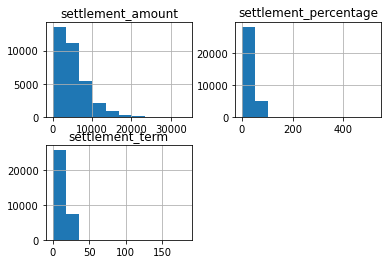

In [ ]:
accepted[['settlement_term', 'settlement_amount', 'settlement_percentage']].hist()

In [ ]:
accepted.loc[accepted['settlement_status'] == "abc", "settlement_term"] = 9999
accepted.loc[accepted['settlement_status'] == "abc", "settlement_amount"] = 99999
accepted.loc[accepted['settlement_status'] == "abc", "settlement_percentage"] = 9999

In [ ]:
accepted.isnull().sum().values

array([      0,       0,       0,       0,       0,       0,       0,
             0,       0,   85785,   78511,       0,       0,       0,
             0,       0,       0,       0, 1221778,       0,   16659,
             1,       0,     374,       0,       0,       0,       0,
             1,  678743, 1116755,       0,       0,       0,     857,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,    2313,       0, 1345310,
            55,       0,       0,      56,  991560,       0,       0,
       1319510, 1319513, 1319715,       0,   67527,   67527,  807713,
        807712,  807712,  807712,  821928,  807712,  880294,  807712,
        807712,  807712,  807765,   67527,  807712,  807713,  807713,
         47281,   67549,   61143,   61912,      56,       0,  105575,
         67528,   67528,   67527,   47281,   60221, 1026290,  174071,
        895348,   67527,   67527,   67527,   55841,   67527,   67527,
         67527,   67

In [ ]:
# How many columns have exactly 2226422 nulls
#accepted.isnull().sum()== 1339556
accepted.columns[accepted.isnull().sum() == 1339556]   # 6: All settlement related columns
#accepted.isnull().sum()== 1326680
accepted.columns[accepted.isnull().sum() == 1326680]
accepted.columns[accepted.isnull().sum() == 67527]
accepted.columns[accepted.isnull().sum() == 807712]


Index(['hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'hardship_payoff_balance_amount',
       'hardship_last_payment_amount'],
      dtype='object')

Index(['sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_open_act_il',
       'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med'],
      dtype='object')

Index(['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'mo_sin_rcnt_tl',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'tot_hi_cred_lim', 'total_il_high_credit_limit'],
      dtype='object')

Index(['open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'inq_fi'],
      dtype='object')